In [1]:
import numpy as np
import matplotlib.pyplot as plt
import jupyter as j
import importlib

custom jupyter @DanielRobinson


In [183]:
def compare(files, thresh, text, ylabel, xlabel, ky, kx, ry, rx, overlays=['ublox', 'quectel'], graphs=['zte', 'nokia'], split=1, hist=False, bins=20):
    importlib.reload(j)
    j.compare(files, thresh, text, ylabel, xlabel, ky, kx, ry, rx, overlays, graphs, split, hist, bins)

In [3]:
files = []
files.append(['release/release1/*','release/release16/*','release/release64/*','release/release128/*','release/release256/*','release/release512/*', 'release/release0/*'])
files.append(['echo/deregister/*', 'echo/e/*', 'echo/echo/*', 'echo/register/*'])
files.append(['cops/delay/*', 'cops/deregister/*', 'cops/release/*', 'cops/tensec/*'])
files.append(['drx/cap/*'])
files.append(['ptau/capture/*'])
files = sum(files, [])
print(files)

['release/release1/*', 'release/release16/*', 'release/release64/*', 'release/release128/*', 'release/release256/*', 'release/release512/*', 'release/release0/*', 'echo/deregister/*', 'echo/e/*', 'echo/echo/*', 'echo/register/*', 'cops/delay/*', 'cops/deregister/*', 'cops/release/*', 'cops/tensec/*', 'drx/cap/*', 'ptau/capture/*']


custom jupyter @DanielRobinson


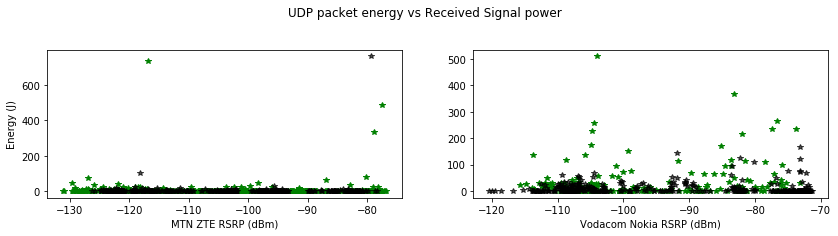

custom jupyter @DanielRobinson


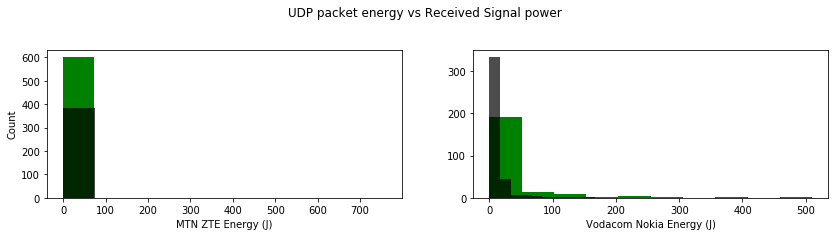

In [6]:
def thresh(a, key, split):
    a = np.array(a[key])
    r = a == a
    if key == 'Signal power':
        r *= a > -1450
    return r, None
compare(files, thresh, 'UDP packet energy vs Received Signal power', 'Energy (J)', 'RSRP (dBm)', 'energy', 'Signal power', 1000, 10, 'all_nw', 'all', 1)
compare(files, thresh, 'UDP packet energy vs Received Signal power', 'Count', 'Energy (J)', 'energy', 'Signal power', 1000, 10, 'all_nw', 'all', 1, True)

custom jupyter @DanielRobinson


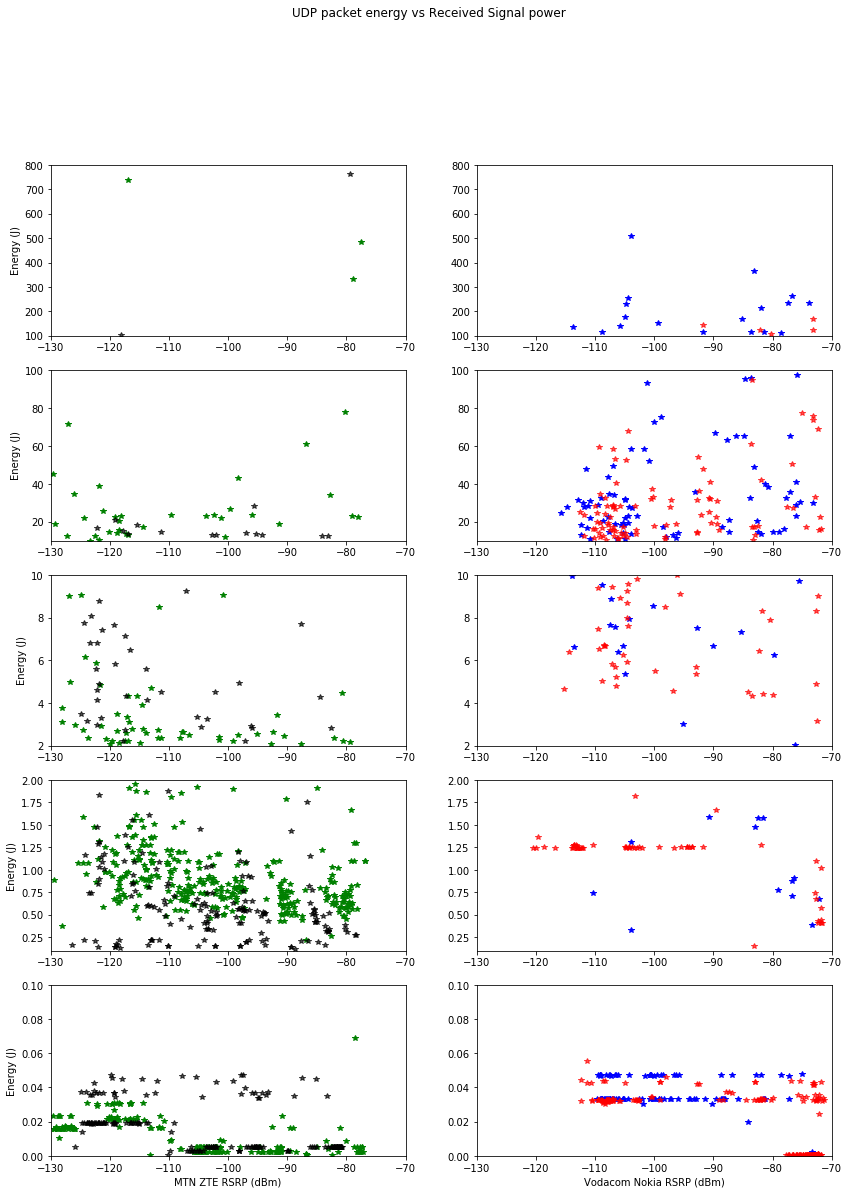

In [29]:
def thresh(a, key, split):
    a = np.array(a[key])
    r = a == a
    lim = [None, None]
    tsplit, slen = split
    if key == 'energy':
        r *= a > 0
        limits = [800000, 100000, 10000, 2000, 100, 0]
        # r, lim = j.splitter(r, a, limits[1:-1], split)
        lim = [limits[tsplit+1], limits[tsplit]]
        r *= a < limits[tsplit]
        r *= a >= limits[tsplit+1]
    elif key == 'Signal power':
        r *= a > -1450
        lim = [-1300, -700]
    return r, lim
compare(files, thresh, 'UDP packet energy vs Received Signal power', 'Energy (J)', 'RSRP (dBm)', 'energy', 'Signal power', 1000, 10, 'all_nw', 'all', 5)

(array([4., 0., 4., 0., 0., 5., 0., 5., 0., 2.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

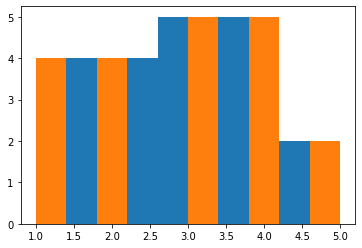

In [57]:
a = [1,1,1,2,5,5,4,2,3,4,4,3,2,1,2,3,3,4,4,3,]
plt.hist(a, 5)
plt.hist(a, range=[min(a), max(a)])

In [187]:
h = np.histogram(a, range=[min(a), max(a)])
# np.histogram?

custom jupyter @DanielRobinson
100.0 800.0 0.0 3.15
10.0 100.0 0.0 23.1
2.0 10.0 0.0 6.3
0.1 2.0 0.0 44.1
0.0 0.1 0.0 99.75


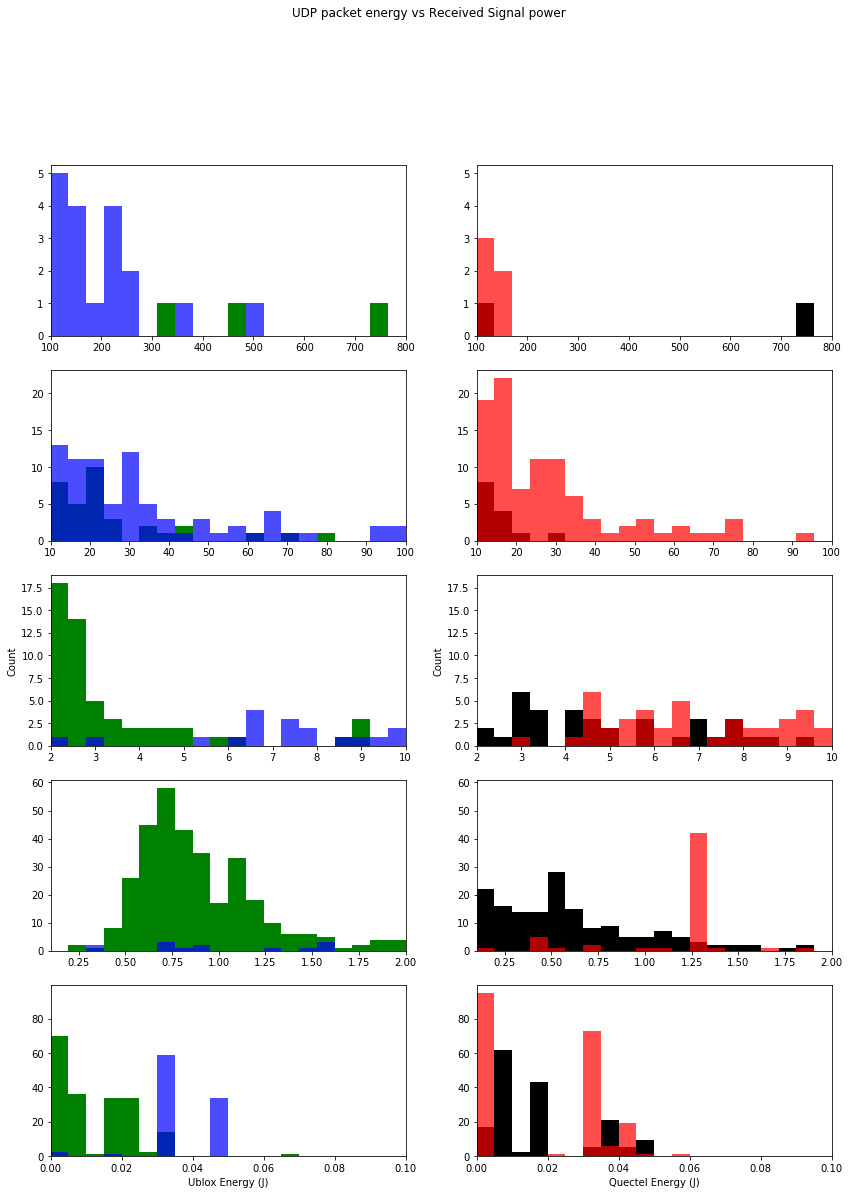

In [193]:
compare(files, thresh, 'UDP packet energy vs Received Signal power', 'Count', 'Energy (J)', 'energy', 'Signal power', 1000, 10, ['zte', 'nokia'], ['ublox', 'quectel'], 5, True, 20)

custom jupyter @DanielRobinson


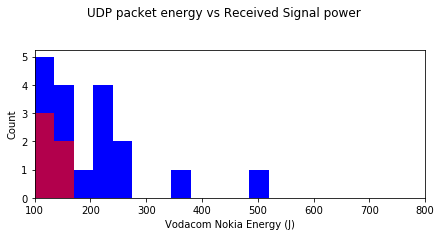

In [196]:
compare(files, thresh, 'UDP packet energy vs Received Signal power', 'Count', 'Energy (J)', 'energy', 'Signal power', 1000, 10, ['ublox', 'quectel'], ['nokia'], 1, True, 20)

custom jupyter @DanielRobinson
100.0 800.0 0.0 2.1
10.0 100.0 0.0 40.95
2.0 10.0 0.0 7.35
0.1 2.0 0.0 44.1
0.0 0.1 0.0 99.75


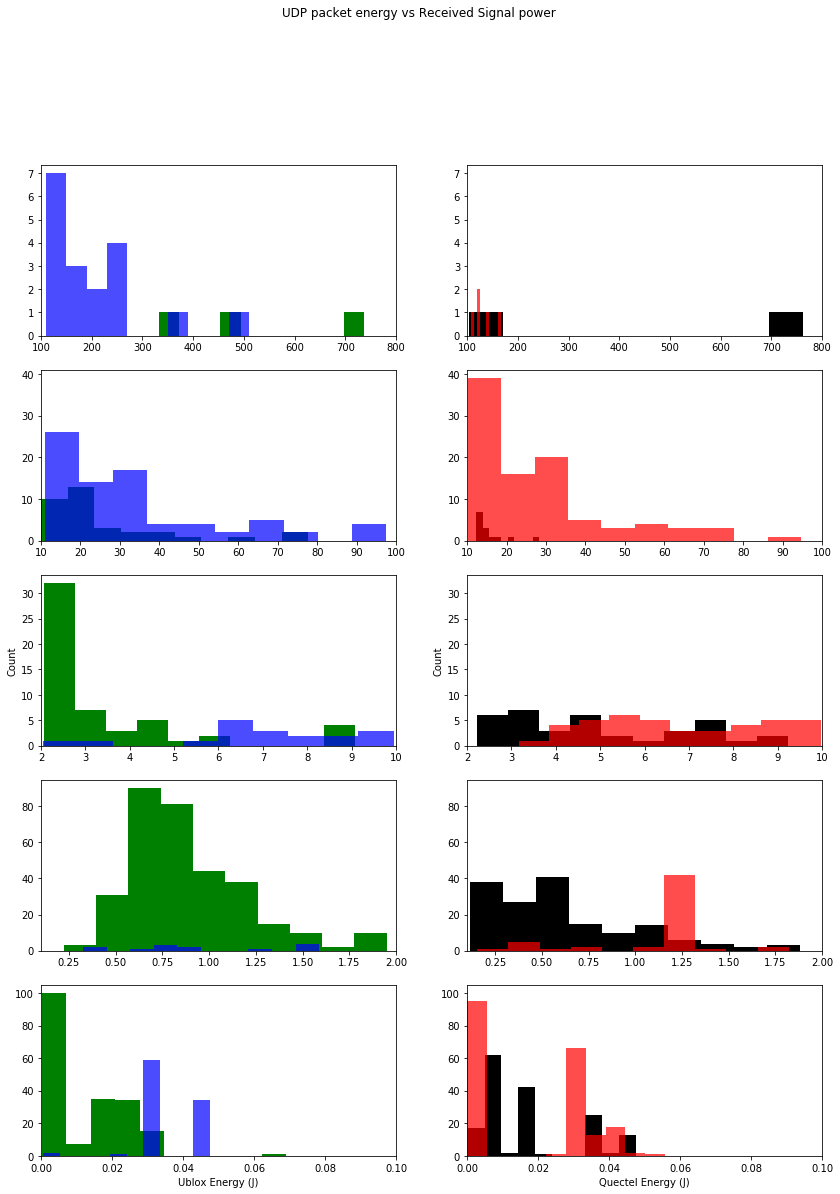

In [167]:
compare(files, thresh, 'UDP packet energy vs Received Signal power', 'Count', 'Energy (J)', 'energy', 'Signal power', 1000, 10, ['zte', 'nokia'], ['ublox', 'quectel'], 5, True)

custom jupyter @DanielRobinson


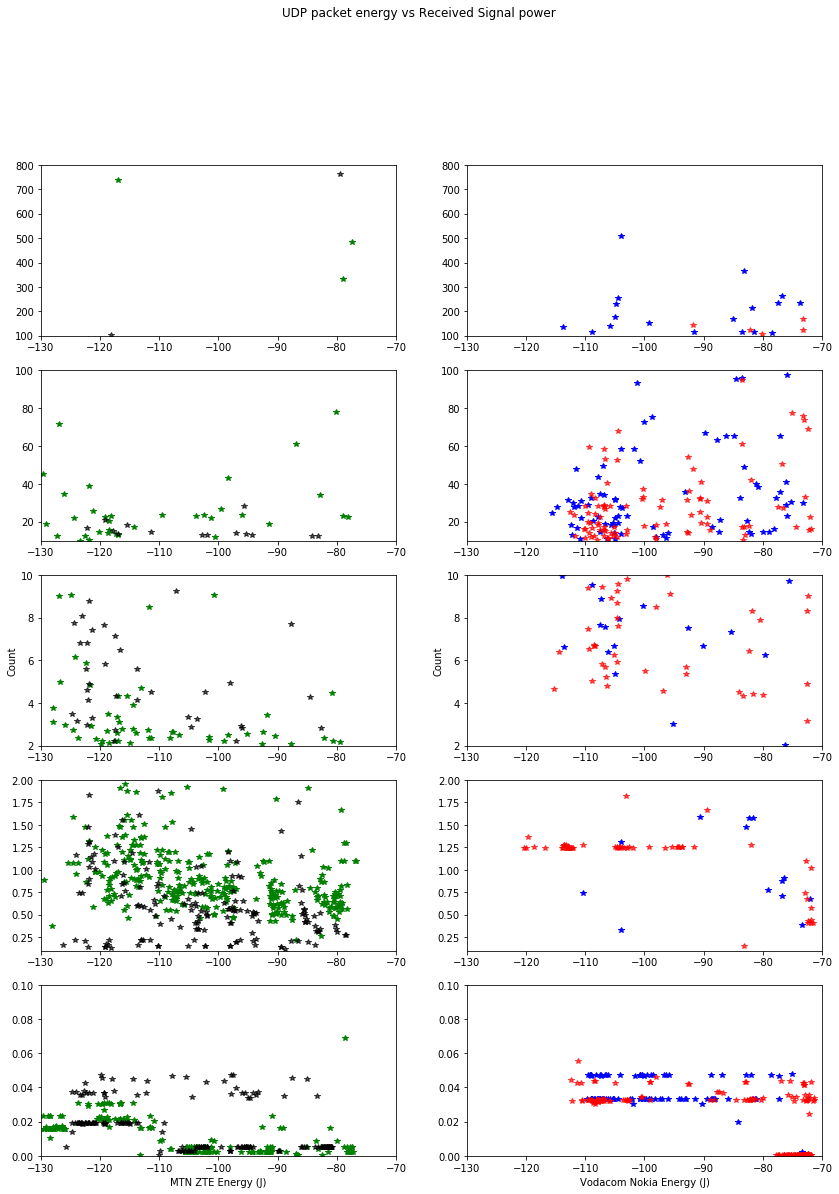

In [165]:
compare(files, thresh, 'UDP packet energy vs Received Signal power', 'Count', 'Energy (J)', 'energy', 'Signal power', 1000, 10, ['ublox', 'quectel'], ['zte', 'nokia'], 5)